<a href="https://colab.research.google.com/github/Choesoohwan/CSH/blob/main/roboflow%2Byolov5_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving data.zip to data.zip


In [3]:
!mkdir export

In [4]:
!unzip data.zip -d./export

Archive:  data.zip
  inflating: ./export/images/0001_jpg.rf.15e6d64ad0edfb7e8cffe3516aeeb74b.jpg  
  inflating: ./export/images/0001_jpg.rf.5b89be2a8f940839e7b396ebdca3ee34.jpg  
  inflating: ./export/images/0001_jpg.rf.a779a71195fa0119af50006b4f6d83a7.jpg  
  inflating: ./export/images/0002_jpg.rf.6164ecabef9ed72f6898f3eb0a3caf54.jpg  
  inflating: ./export/images/0002_jpg.rf.e4d0fa7fb76193e5362f53fa9223e061.jpg  
  inflating: ./export/images/0002_jpg.rf.ede8b2df3fd0a00dd2bd0a67625f9306.jpg  
  inflating: ./export/images/0005_jpg.rf.151a343034823ecbb2e6041628073e47.jpg  
  inflating: ./export/images/0005_jpg.rf.68a0ef3d022edd83f290d6f9ae25086d.jpg  
  inflating: ./export/images/0005_jpg.rf.ccdbe9736b1b53c4ebf5d62715fe88a0.jpg  
  inflating: ./export/images/0016_jpg.rf.6283a6432216ef5ba70c0af8ad121ccb.jpg  
  inflating: ./export/images/0016_jpg.rf.6bf6e5347d9fa37f53fe1a7441be39ac.jpg  
  inflating: ./export/images/0026_jpg.rf.580cc79f438193375745a51e9eaf0f87.jpg  
  inflating: ./export

In [5]:
%cd / content
! git clone https://github.com/ultralytics/yolov5.git


[Errno 2] No such file or directory: '/ content'
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.02 MiB | 13.07 MiB/s, done.
Resolving deltas: 100% (10291/10291), done.


In [6]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00


In [8]:
%cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['car', 'people']

roboflow:
  workspace: warsaw-university-of-technology-f0ldu
  project: realistic_photos_pickups_cars_buses_pedestrians
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/warsaw-university-of-technology-f0ldu/realistic_photos_pickups_cars_buses_pedestrians/dataset/3

In [28]:
%cd /
from glob import glob

img_list=glob('/content/dataset/export/images/*.jpg')
print(len(img_list))
     

/
217


In [29]:
from sklearn.model_selection import train_test_split

tarin_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(tarin_img_list), len(val_img_list))

173 44


In [30]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(tarin_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [31]:
import yaml

with open('content/dataset/data.yaml', 'r') as f:
  data=yaml.safe_load(f)
  
print(data)

data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['car', 'people'], 'nc': 2, 'roboflow': {'license': 'CC BY 4.0', 'project': 'realistic_photos_pickups_cars_buses_pedestrians', 'url': 'https://universe.roboflow.com/warsaw-university-of-technology-f0ldu/realistic_photos_pickups_cars_buses_pedestrians/dataset/3', 'version': 3, 'workspace': 'warsaw-university-of-technology-f0ldu'}, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}
{'names': ['car', 'people'], 'nc': 2, 'roboflow': {'license': 'CC BY 4.0', 'project': 'realistic_photos_pickups_cars_buses_pedestrians', 'url': 'https://universe.roboflow.com/warsaw-university-of-technology-f0ldu/realistic_photos_pickups_cars_buses_pedestrians/dataset/3', 'version': 3, 'workspace': 'warsaw-university-of-technology-f0ldu'}, 'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt'}


In [32]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 40 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name object_detection_result

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=object_detection_result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

detect: weights=['/content/yolov5/runs/train/object_detection_result/weights/best.pt'], source=/content/dataset/export/images/ezgif-frame-089-Copy_jpg.rf.bbb56ff8cfb7ab1afb7b87e223cb870d.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/ezgif-frame-089-Copy_jpg.rf.bbb56ff8cfb7ab1afb7b87e223cb870d.jpg: 256x416 5 cars, 4 peoples, 12.5ms
Speed: 0.3ms pre-process, 12.5ms inference, 1.5ms NMS per image at shape (1, 3, 416, 416)
Res

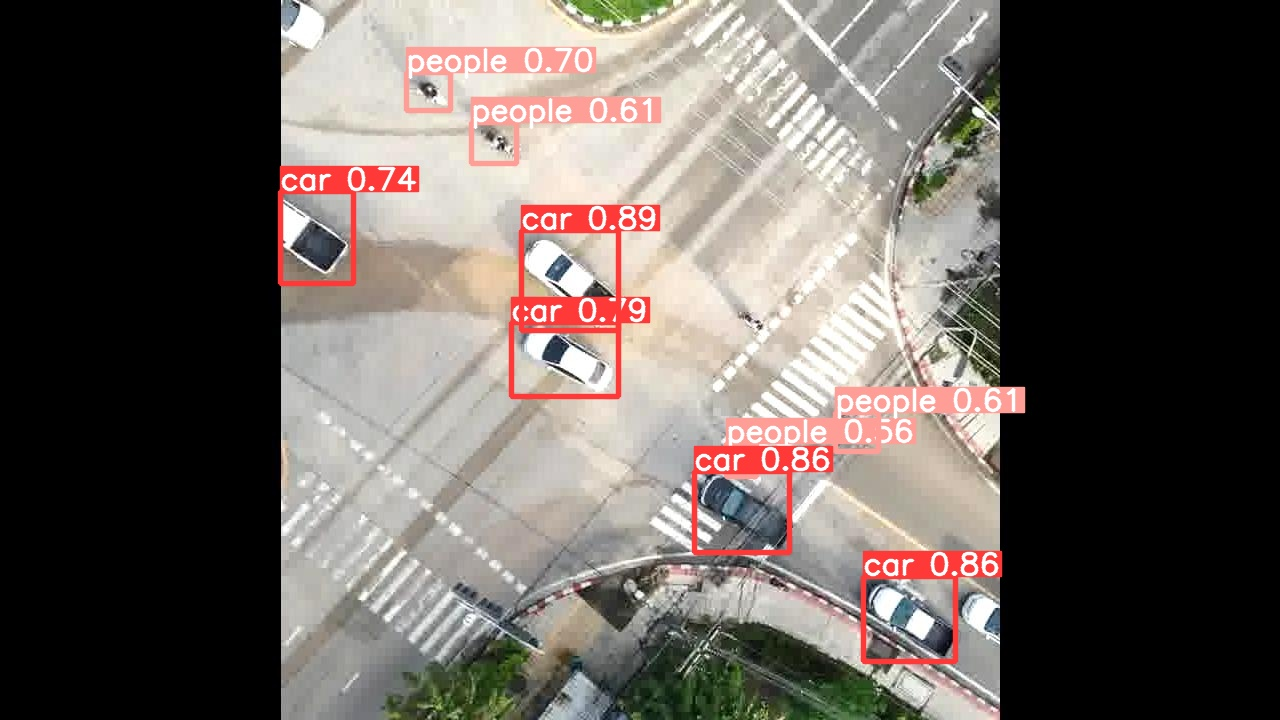

In [33]:
from IPython.display import Image, display
import os

val_img_path = val_img_list[10]

!python detect.py --weights /content/yolov5/runs/train/object_detection_result/weights/best.pt --img 416 --conf 0.5 --source "{val_img_path}"
Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))

In [21]:
!python detect.py --source /content/dataset/drone.mp4 --weights /content/yolov5/runs/train/object_detection_result/weights/best.pt

detect: weights=['/content/yolov5/runs/train/object_detection_result/weights/best.pt'], source=/content/dataset/drone.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/250) /content/dataset/drone.mp4: 384x640 41 cars, 8 peoples, 12.9ms
video 1/1 (2/250) /content/dataset/drone.mp4: 384x640 38 cars, 7 peoples, 11.2ms
video 1/1 (3/250) /content/dataset/drone.mp4: 384x640 47 cars, 7 peoples, 11.8ms
video 1/1 (4/250) /content/dataset/drone.mp4: 384x640 43 ca

In [34]:
!python detect.py --source /content/dataset/drone.mp4 --weights /content/yolov5/runs/train/object_detection_result/weights/best.pt

detect: weights=['/content/yolov5/runs/train/object_detection_result/weights/best.pt'], source=/content/dataset/drone.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/250) /content/dataset/drone.mp4: 384x640 31 cars, 7 peoples, 13.4ms
video 1/1 (2/250) /content/dataset/drone.mp4: 384x640 32 cars, 7 peoples, 11.1ms
video 1/1 (3/250) /content/dataset/drone.mp4: 384x640 30 cars, 6 peoples, 11.9ms
video 1/1 (4/250) /content/dataset/drone.mp4: 384x640 34 ca